In [13]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict 


In [10]:
class BatmanState(TypedDict):
    runs: int
    bowls:int
    fours:int
    sixes:int
    strike_rate:float
    bowls_per_boundary:float
    boundary_percentage:float
    summary: str

    

In [17]:
def calculate_strike_rate(state:BatmanState):
    strike_rate = (state['runs'] / state['bowls']) * 100

    return {'strike_rate': strike_rate}

In [24]:
def calculate_bowls_per_boundary(state:BatmanState):
    bowls_per_boundary=state['fours']+state['sixes']/state['bowls']
    return {'bowls_per_boundary': bowls_per_boundary}

In [19]:
def calculate_boundary_percentage(state:BatmanState):
    boundary_percentage=(((state['fours']*4)+(state['sixes']*6))/state['runs']) * 100
    return {'boundary_percentage': boundary_percentage}

In [25]:
def summary(state:BatmanState):
    summary=f'''
    Stike Rate:{state['strike_rate']}
    Bowls per Boundary:{state['bowls_per_boundary']}
    Boundary Percentage:{state['boundary_percentage']}
    '''
    return {'summary': summary}


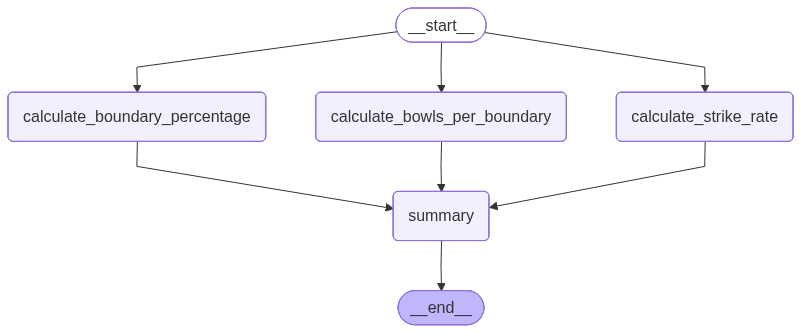

In [26]:
graph = StateGraph(BatmanState)

graph.add_node('calculate_strike_rate',calculate_strike_rate)
graph.add_node('calculate_bowls_per_boundary',calculate_bowls_per_boundary)
graph.add_node('calculate_boundary_percentage',calculate_boundary_percentage)
graph.add_node('summary',summary)


graph.add_edge(START,'calculate_strike_rate')
graph.add_edge(START,'calculate_bowls_per_boundary')
graph.add_edge(START,'calculate_boundary_percentage')

graph.add_edge('calculate_strike_rate','summary')
graph.add_edge('calculate_bowls_per_boundary','summary')
graph.add_edge('calculate_boundary_percentage','summary')

graph.add_edge('summary',END)

workflowgraph = graph.compile()
workflowgraph 





In [27]:
initial_state = {"runs":100,"bowls":50,"fours":6,"sixes":4}

workflowgraph.invoke(initial_state)

{'runs': 100,
 'bowls': 50,
 'fours': 6,
 'sixes': 4,
 'strike_rate': 200.0,
 'bowls_per_boundary': 6.08,
 'boundary_percentage': 48.0,
 'summary': '\n    Stike Rate:200.0\n    Bowls per Boundary:6.08\n    Boundary Percentage:48.0\n    '}